# **Proyek Capstone : Membuat Model Sistem Rekomendasi Resep Makanan**

## **Import library**

In [1]:
!pip install wordcloud

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.9/547.9 kB 6.9 MB/s eta 0:00:00


In [2]:
# Import libraries basic
import os
import pandas as pd
import numpy as np
import zipfile
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="ticks")
pd.set_option('display.max_colwidth', 50)

# visualisi
from wordcloud import WordCloud
from IPython.display import display
from collections import Counter
import spacy

# prepocesing data
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import json

# evaluasi
from itertools import combinations

## **Data Understanding**

### Data Loading

In [3]:
# Baca data dari link raw GitHub
url = 'https://raw.githubusercontent.com/MohPras/kumpulan_data_pribadi/refs/heads/main/data_resep.csv'
df = pd.read_csv(url)
df.head(5)

,title,ingredients,directions,link,source,NER,site
0,Marinated Flank Steak Recipe,"[""1 1/2 pound flank steak"", ""1/2 c. finely min...","[""Remove tenderloin from steak."", ""Score meat....",cookeatshare.com/recipes/marinated-flank-steak...,Recipes1M,"[""soy sauce"", ""green onions"", ""salad oil"", ""se...",cookeatshare.com
1,French Chicken Stew,"[""1 tablespoon rosemary"", ""1 teaspoon thyme"", ...","[""combine all ingredients in slow cooker (6 qu...",www.yummly.com/recipe/French-Chicken-Stew-1433580,Gathered,"[""mushroom mix"", ""pepper"", ""button mushrooms"",...",www.yummly.com
2,Glazed Carrots,"[""3 to 4 carrots"", ""1 1/2 Tbsp. butter"", ""1/3 ...","[""Cook 3 to 4 carrots; cut crosswise in 1-inch...",www.cookbooks.com/Recipe-Details.aspx?id=1011892,Gathered,"[""butter"", ""brown sugar"", ""carrots"", ""lemon ri...",www.cookbooks.com
3,Moms Pie Dough,"[""4.5 Cups Flour"", ""1.5 Tsp Salt"", ""Pinch Baki...","[""Mix all dry ingredients in a bowl."", """", ""Ad...",www.epicurious.com/recipes/member/views/moms-p...,Gathered,"[""egg"", ""baking powder"", ""sugar"", ""crisco"", ""v...",www.epicurious.com
4,Pretzel Salad Or Dessert,"[""2 c. crushed small thin pretzels (sticks)"", ...","[""Mix and press in baking pan, approximately 1...",www.cookbooks.com/Recipe-Details.aspx?id=106723,Gathered,"[""thin pretzels"", ""margarine""]",www.cookbooks.com


In [4]:
# lihat jumlah data
print(df.shape)

(3010, 7)


## **Data Preparation**

### Informasi dataset

In [5]:
# cek info dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3010 entries, 0 to 3009
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   title        3010 non-null   object
 1   ingredients  3010 non-null   object
 2   directions   3010 non-null   object
 3   link         3010 non-null   object
 4   source       3010 non-null   object
 5   NER          3010 non-null   object
 6   site         3010 non-null   object
dtypes: object(7)
memory usage: 164.7+ KB


In [6]:
# cek informasi data
df.head()

,title,ingredients,directions,link,source,NER,site
0,Marinated Flank Steak Recipe,"[""1 1/2 pound flank steak"", ""1/2 c. finely min...","[""Remove tenderloin from steak."", ""Score meat....",cookeatshare.com/recipes/marinated-flank-steak...,Recipes1M,"[""soy sauce"", ""green onions"", ""salad oil"", ""se...",cookeatshare.com
1,French Chicken Stew,"[""1 tablespoon rosemary"", ""1 teaspoon thyme"", ...","[""combine all ingredients in slow cooker (6 qu...",www.yummly.com/recipe/French-Chicken-Stew-1433580,Gathered,"[""mushroom mix"", ""pepper"", ""button mushrooms"",...",www.yummly.com
2,Glazed Carrots,"[""3 to 4 carrots"", ""1 1/2 Tbsp. butter"", ""1/3 ...","[""Cook 3 to 4 carrots; cut crosswise in 1-inch...",www.cookbooks.com/Recipe-Details.aspx?id=1011892,Gathered,"[""butter"", ""brown sugar"", ""carrots"", ""lemon ri...",www.cookbooks.com
3,Moms Pie Dough,"[""4.5 Cups Flour"", ""1.5 Tsp Salt"", ""Pinch Baki...","[""Mix all dry ingredients in a bowl."", """", ""Ad...",www.epicurious.com/recipes/member/views/moms-p...,Gathered,"[""egg"", ""baking powder"", ""sugar"", ""crisco"", ""v...",www.epicurious.com
4,Pretzel Salad Or Dessert,"[""2 c. crushed small thin pretzels (sticks)"", ...","[""Mix and press in baking pan, approximately 1...",www.cookbooks.com/Recipe-Details.aspx?id=106723,Gathered,"[""thin pretzels"", ""margarine""]",www.cookbooks.com


### Cek Missing value

In [7]:
# cek missing value
print(df.isna().sum())

title          0
ingredients    0
directions     0
link           0
source         0
NER            0
site           0
dtype: int64


In [8]:
# # Hapus missing value
# df.dropna(subset=['track_name', 'track_artist', 'track_album_name'], inplace=True)
# print(df.isnull().sum())

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3010 entries, 0 to 3009
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   title        3010 non-null   object
 1   ingredients  3010 non-null   object
 2   directions   3010 non-null   object
 3   link         3010 non-null   object
 4   source       3010 non-null   object
 5   NER          3010 non-null   object
 6   site         3010 non-null   object
dtypes: object(7)
memory usage: 164.7+ KB


### Cek duplikasi data

In [10]:
# cek duplikasi data
print('Duplikasi data ada: ', df.duplicated().sum())

Duplikasi data ada:  0


tidak ada data yang duplikat

## **Univariate Exploratory Data Analysis**

### Eksplorasi Content-Based Filtering (CBF)

Content-Based Filtering (CBF) — sistem rekomendasi yang berdasarkan fitur produk, bukan interaksi antar pengguna. Content-based filtering merekomendasikan produk ke user berdasarkan kesamaan antara produk yang pernah disukai dengan produk lain yang punya atribut mirip.

In [11]:
df.head()

,title,ingredients,directions,link,source,NER,site
0,Marinated Flank Steak Recipe,"[""1 1/2 pound flank steak"", ""1/2 c. finely min...","[""Remove tenderloin from steak."", ""Score meat....",cookeatshare.com/recipes/marinated-flank-steak...,Recipes1M,"[""soy sauce"", ""green onions"", ""salad oil"", ""se...",cookeatshare.com
1,French Chicken Stew,"[""1 tablespoon rosemary"", ""1 teaspoon thyme"", ...","[""combine all ingredients in slow cooker (6 qu...",www.yummly.com/recipe/French-Chicken-Stew-1433580,Gathered,"[""mushroom mix"", ""pepper"", ""button mushrooms"",...",www.yummly.com
2,Glazed Carrots,"[""3 to 4 carrots"", ""1 1/2 Tbsp. butter"", ""1/3 ...","[""Cook 3 to 4 carrots; cut crosswise in 1-inch...",www.cookbooks.com/Recipe-Details.aspx?id=1011892,Gathered,"[""butter"", ""brown sugar"", ""carrots"", ""lemon ri...",www.cookbooks.com
3,Moms Pie Dough,"[""4.5 Cups Flour"", ""1.5 Tsp Salt"", ""Pinch Baki...","[""Mix all dry ingredients in a bowl."", """", ""Ad...",www.epicurious.com/recipes/member/views/moms-p...,Gathered,"[""egg"", ""baking powder"", ""sugar"", ""crisco"", ""v...",www.epicurious.com
4,Pretzel Salad Or Dessert,"[""2 c. crushed small thin pretzels (sticks)"", ...","[""Mix and press in baking pan, approximately 1...",www.cookbooks.com/Recipe-Details.aspx?id=106723,Gathered,"[""thin pretzels"", ""margarine""]",www.cookbooks.com


In [12]:
# seleksi fitur untuk CBF
cbf_features = [
    'title',
    'ingredients',
    'directions',
    'NER'
]

cbf_df = df[cbf_features]

In [13]:
# lihat data
cbf_df.head()

,title,ingredients,directions,NER
0,Marinated Flank Steak Recipe,"[""1 1/2 pound flank steak"", ""1/2 c. finely min...","[""Remove tenderloin from steak."", ""Score meat....","[""soy sauce"", ""green onions"", ""salad oil"", ""se..."
1,French Chicken Stew,"[""1 tablespoon rosemary"", ""1 teaspoon thyme"", ...","[""combine all ingredients in slow cooker (6 qu...","[""mushroom mix"", ""pepper"", ""button mushrooms"",..."
2,Glazed Carrots,"[""3 to 4 carrots"", ""1 1/2 Tbsp. butter"", ""1/3 ...","[""Cook 3 to 4 carrots; cut crosswise in 1-inch...","[""butter"", ""brown sugar"", ""carrots"", ""lemon ri..."
3,Moms Pie Dough,"[""4.5 Cups Flour"", ""1.5 Tsp Salt"", ""Pinch Baki...","[""Mix all dry ingredients in a bowl."", """", ""Ad...","[""egg"", ""baking powder"", ""sugar"", ""crisco"", ""v..."
4,Pretzel Salad Or Dessert,"[""2 c. crushed small thin pretzels (sticks)"", ...","[""Mix and press in baking pan, approximately 1...","[""thin pretzels"", ""margarine""]"


#### Eksplorasi Nama resep Variabel

In [14]:
# jumlah title resep
unique_title_name = df['title'].nunique()
print(f"Jumlah title unik: {unique_title_name}")

Jumlah title unik: 2881


In [15]:
# Menampilkan daftar nama title resep tanpa format tabel, dalam bentuk list
title_names = df['title'].dropna().unique()

print("Daftar Nama resep:")
for idx, name in enumerate(title_names, 1):
    print(f"{idx}. {name}")

Daftar Nama resep:
1. Marinated Flank Steak Recipe
2. French Chicken Stew
3. Glazed Carrots
4. Moms Pie Dough 
5. Pretzel Salad Or Dessert
6. Citrus Syrup
7. Cranberry And Candied Orange Chutney 
8. Tau Kua He Ci Medan'S Favourite Food 
9. Jamaica Barbecue Sauce
10. Dill Dip
11. Crab, Grapefruit And Watercress Salad
12. Sloppy Joe Grilled Cheese
13. Strawberry Tart
14. Broccoli Casserole
15. Vegetable Salad
16. Easy Rhubarb Jam Recipe
17. Portzelky (New Year'S Cookies)
18. Frozen Fruit Medley
19. Banana Slush
20. Just Peachy Iced Tea
21. Caramel Snappers
22. Nutty Butty Pie
23. Pine Nut Cookie Cups
24. Barbecued Beef Brisket Recipe
25. Chocolate Oinks
26. Extra Flaky Pie Crust
27. Bacon Quiche Biscuit Cups
28. Pasta with Anchovies and Tomatoes
29. Mustard Plus Glazed Pork Chops
30. Simple Ranch Beans
31. Chocolate Cookies(No Bake)  
32. Spinach and Rice Casserole
33. Barbecue Sauce
34. Cornish Game Hen (With Wild Rice)
35. Pull-Apart Rolls
36. Mostaccioli
37. Balsamic Vinegar Marinade


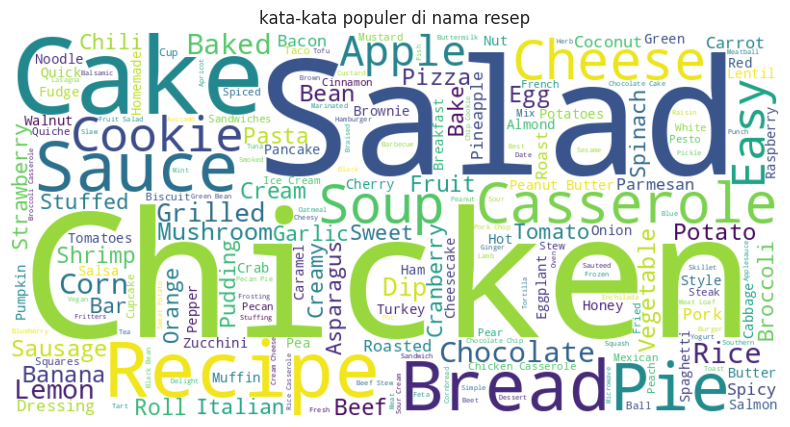

In [16]:
# Analisis kata-kata populer di nama resep

text = " ".join(df['title'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('kata-kata populer di nama resep')
plt.show()

**Analisa**

jumlah nama resep adaa 2881 dan kata-kata pada resep paling populer adalah salad

#### Eksplorasi Ingredients Variabel

In [17]:
# Jumlah nilai unik ingredients
unique_ingredients_entries = df['ingredients'].nunique()
print(f"Jumlah entri ingredients unik: {unique_ingredients_entries}")

Jumlah entri ingredients unik: 3010


In [18]:
# Menampilkan beberapa entri bahan (ingredients) secara acak
print("\nContoh entri ingredients:")
sample_ingredients = df['ingredients'].dropna().sample(5, random_state=1)
for idx, item in enumerate(sample_ingredients, 1):
    print(f"{idx}. {item}")


Contoh entri ingredients:
1. ["3 tablespoons butter", "4 cups mini marshmallows", "6 1/2 - 7 cups Rice Krispies", "1 (18 ounce) package refrigerated sugar cookie dough", "2/3 cup flour", "32 wooden toothpicks", "1 teaspoon water", "4 drops green food coloring", "1 1/2 cups flaked coconut", "black decorating gel", "vanilla frosting", "1 cup semi-sweet chocolate chips", "16 decorative candies, pumpkins"]
2. ["4 Tablespoons Paprika", "4 Tablespoons Garlic Salt", "1 Tablespoon Salt", "1- 1/2 Tablespoon Black Pepper", "1- 1/2 Tablespoon Dried Oregano", "6 cups Buttermilk", "12 whole Chicken Legs", "12 whole Chicken Wings", "6 cups All-purpose Flour", "2 Tablespoons Salt", "2 Tablespoons Sugar", "64 ounces, fluid Peanut Oil For Frying"]
3. ["1 each pastry unbaked 10 inch, well chilled, fluted edge", "1 x pastry leaf shapes cut from scraps", "1 1/2 cups pumpkin puree, fresh or canned", "1/2 cup maple syrup", "1 1/2 cups milk", "2 large eggs lightly beaten", "2 tablespoons flour, all-purpose"

In [19]:
# Ubah kolom ingredients menjadi list kata individual (asumsi bahan dipisah koma)
ingredient_lists = df['ingredients'].dropna().str.lower().str.split(',')

In [20]:
# Rata-rata jumlah bahan per resep
avg_ingredients_per_recipe = ingredient_lists.apply(len).mean()
print(f"\nRata-rata jumlah bahan per resep: {avg_ingredients_per_recipe:.2f}")


Rata-rata jumlah bahan per resep: 10.66


In [21]:
# Flatten list dan hitung frekuensi bahan
all_ingredients = [ingredient.strip() for sublist in ingredient_lists for ingredient in sublist]
ingredient_counts = Counter(all_ingredients)

In [22]:
# 10 bahan paling umum
most_common_ingredients = ingredient_counts.most_common(10)
print("\n10 bahan yang paling umum digunakan:")
for i, (ingredient, count) in enumerate(most_common_ingredients, 1):
    print(f"{i}. {ingredient} ({count} resep)")


10 bahan yang paling umum digunakan:
1. chopped" (521 resep)
2. minced" (234 resep)
3. diced" (156 resep)
4. divided" (141 resep)
5. sliced" (133 resep)
6. "2 eggs" (119 resep)
7. softened" (109 resep)
8. finely chopped" (107 resep)
9. "1/2 tsp. salt" (105 resep)
10. drained" (103 resep)


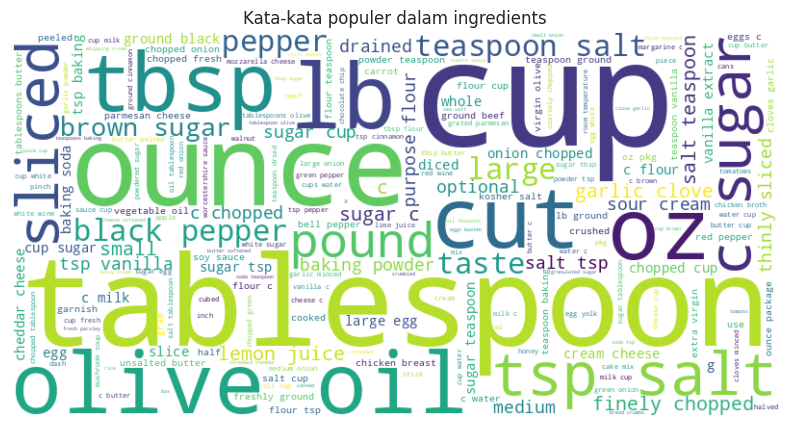

In [23]:
# Visualisasi word cloud untuk bahan-bahan
text = " ".join(all_ingredients)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Kata-kata populer dalam ingredients')
plt.show()

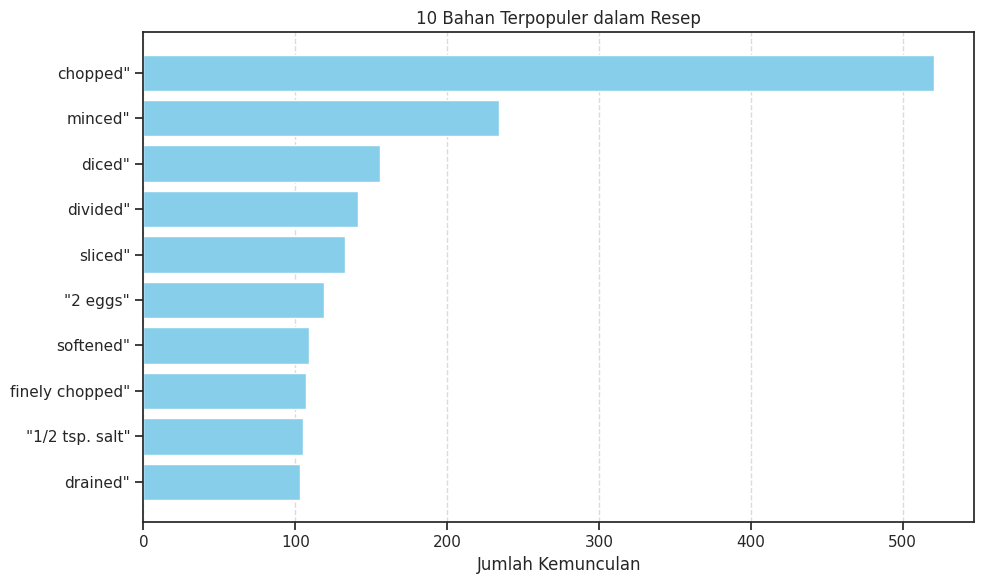

In [24]:
# Visualisasi bar chart 10 bahan terpopuler
ingredients_df = pd.DataFrame(most_common_ingredients, columns=['Ingredient', 'Frequency'])

plt.figure(figsize=(10, 6))
plt.barh(ingredients_df['Ingredient'][::-1], ingredients_df['Frequency'][::-1], color='skyblue')
plt.xlabel('Jumlah Kemunculan')
plt.title('10 Bahan Terpopuler dalam Resep')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**Analisis Data Ingredients**

1. Hasil visualisasi menunjukkan bahwa kata-kata yang paling sering muncul dalam kolom ingredients justru bukan nama bahan makanan utama, melainkan deskripsi atau instruksi terkait pengolahan bahan seperti:

2. "chopped", "minced", "diced", "divided", dan "sliced" merupakan kata kerja yang menggambarkan proses pemotongan bahan.

3. Kata seperti "softened" dan "drained" juga termasuk dalam kategori kata kerja instruksional.

4. Bahkan terdapat entri seperti "2 eggs" atau "1/2 tsp. salt" yang menunjukkan ukuran atau jumlah bahan secara langsung.

5. Hal ini mengindikasikan bahwa data ingredients mengandung campuran antara nama bahan, instruksi pengolahan, dan takaran bahan, yang belum sepenuhnya dibersihkan atau dipisahkan secara semantik. Akibatnya, frekuensi tinggi dari kata kerja pemrosesan dapat mengaburkan identifikasi bahan utama yang sebenarnya digunakan dalam resep.

#### Eksplorasi NER Variabel

In [25]:
# Load model bahasa Inggris spaCy
nlp = spacy.load("en_core_web_sm")

# Ambil data ingredients
ingredients_list = cbf_df['ingredients'].dropna().tolist()

# Gabungkan semua ingredients jadi satu teks panjang
text = " ".join(ingredients_list)

# Proses teks dengan spaCy
doc = nlp(text)

# Ambil entitas yang terdeteksi
entities = [ent.text for ent in doc.ents if ent.label_ in ['FOOD', 'ORG', 'PRODUCT', 'GPE', 'NORP', 'QUANTITY']]

# Hitung frekuensi entitas
entity_freq = Counter(entities).most_common(20)

# Tampilkan hasil
print("20 Entitas Terdeteksi Terpopuler:")
for i, (entity, count) in enumerate(entity_freq, 1):
    print(f"{i}. {entity} ({count} kali)")

20 Entitas Terdeteksi Terpopuler:
1. Italian (109 kali)
2. 8 ounces (102 kali)
3. 1 pound (100 kali)
4. 1 cup (89 kali)
5. Cheddar (87 kali)
6. 2 ounces (74 kali)
7. 8 ounce (62 kali)
8. 4 ounces (62 kali)
9. 6 ounces (47 kali)
10. 12 ounces (46 kali)
11. 1-inch (45 kali)
12. French (45 kali)
13. 16 ounce (42 kali)
14. 1/2-inch (38 kali)
15. 1 pkg (36 kali)
16. 3 ounces (35 kali)
17. 1 ounce (35 kali)
18. Swiss (33 kali)
19. 1/2 pound (30 kali)
20. 2 c. flour (29 kali)


**Analisa**

Eksplorasi Named Entity Recognition (NER) terhadap kolom ingredients berhasil mengidentifikasi entitas-entitas dominan yang terbagi menjadi dua kategori utama, yaitu kuantitas bahan dan jenis bahan atau asal masakan. Mayoritas entitas yang muncul berupa satuan dan ukuran seperti "8 ounces", "1 pound", dan "1 cup", yang menunjukkan pentingnya informasi kuantitatif dalam struktur penulisan resep. Di sisi lain, munculnya entitas seperti "Italian", "French", "Cheddar", dan "Swiss" memperlihatkan adanya informasi tentang jenis bahan dan gaya kuliner yang umum digunakan. Hasil ini memberikan gambaran bahwa analisis lebih lanjut, seperti ekstraksi nama bahan murni dan normalisasi satuan, akan sangat berguna untuk membangun sistem informasi resep yang lebih terstruktur dan dapat digunakan dalam aplikasi pemrosesan lanjutan seperti rekomendasi resep atau klasifikasi masakan berdasarkan jenis.

## **Data Preprocessing**

Tujuan: supaya sistem mudah memahami dan mencocokkan produk yang relevan.

### Seleksi fitur CBF

In [26]:
# ambil data
cbf_df.head()

,title,ingredients,directions,NER
0,Marinated Flank Steak Recipe,"[""1 1/2 pound flank steak"", ""1/2 c. finely min...","[""Remove tenderloin from steak."", ""Score meat....","[""soy sauce"", ""green onions"", ""salad oil"", ""se..."
1,French Chicken Stew,"[""1 tablespoon rosemary"", ""1 teaspoon thyme"", ...","[""combine all ingredients in slow cooker (6 qu...","[""mushroom mix"", ""pepper"", ""button mushrooms"",..."
2,Glazed Carrots,"[""3 to 4 carrots"", ""1 1/2 Tbsp. butter"", ""1/3 ...","[""Cook 3 to 4 carrots; cut crosswise in 1-inch...","[""butter"", ""brown sugar"", ""carrots"", ""lemon ri..."
3,Moms Pie Dough,"[""4.5 Cups Flour"", ""1.5 Tsp Salt"", ""Pinch Baki...","[""Mix all dry ingredients in a bowl."", """", ""Ad...","[""egg"", ""baking powder"", ""sugar"", ""crisco"", ""v..."
4,Pretzel Salad Or Dessert,"[""2 c. crushed small thin pretzels (sticks)"", ...","[""Mix and press in baking pan, approximately 1...","[""thin pretzels"", ""margarine""]"


In [27]:
cbf_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3010 entries, 0 to 3009
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   title        3010 non-null   object
 1   ingredients  3010 non-null   object
 2   directions   3010 non-null   object
 3   NER          3010 non-null   object
dtypes: object(4)
memory usage: 94.2+ KB


### Konversi data object ke numerik

In [28]:
# Gabungkan beberapa fitur jadi satu kolom teks
cbf_df['combined_features'] = (
    cbf_df['title'] + ' ' +
    cbf_df['ingredients'] + ' ' +
    cbf_df['directions'] + ' ' +
    cbf_df['NER']
)

<ipython-input-28-6fb1b69452c6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cbf_df['combined_features'] = (


In [29]:
# cek data
cbf_df.head()

,title,ingredients,directions,NER,combined_features
0,Marinated Flank Steak Recipe,"[""1 1/2 pound flank steak"", ""1/2 c. finely min...","[""Remove tenderloin from steak."", ""Score meat....","[""soy sauce"", ""green onions"", ""salad oil"", ""se...","Marinated Flank Steak Recipe [""1 1/2 pound fla..."
1,French Chicken Stew,"[""1 tablespoon rosemary"", ""1 teaspoon thyme"", ...","[""combine all ingredients in slow cooker (6 qu...","[""mushroom mix"", ""pepper"", ""button mushrooms"",...","French Chicken Stew [""1 tablespoon rosemary"", ..."
2,Glazed Carrots,"[""3 to 4 carrots"", ""1 1/2 Tbsp. butter"", ""1/3 ...","[""Cook 3 to 4 carrots; cut crosswise in 1-inch...","[""butter"", ""brown sugar"", ""carrots"", ""lemon ri...","Glazed Carrots [""3 to 4 carrots"", ""1 1/2 Tbsp...."
3,Moms Pie Dough,"[""4.5 Cups Flour"", ""1.5 Tsp Salt"", ""Pinch Baki...","[""Mix all dry ingredients in a bowl."", """", ""Ad...","[""egg"", ""baking powder"", ""sugar"", ""crisco"", ""v...","Moms Pie Dough [""4.5 Cups Flour"", ""1.5 Tsp Sa..."
4,Pretzel Salad Or Dessert,"[""2 c. crushed small thin pretzels (sticks)"", ...","[""Mix and press in baking pan, approximately 1...","[""thin pretzels"", ""margarine""]","Pretzel Salad Or Dessert [""2 c. crushed small ..."


### Data final

In [30]:
cbf_data = cbf_df.copy()

In [31]:
# Baca data
cbf_data.head()

,title,ingredients,directions,NER,combined_features
0,Marinated Flank Steak Recipe,"[""1 1/2 pound flank steak"", ""1/2 c. finely min...","[""Remove tenderloin from steak."", ""Score meat....","[""soy sauce"", ""green onions"", ""salad oil"", ""se...","Marinated Flank Steak Recipe [""1 1/2 pound fla..."
1,French Chicken Stew,"[""1 tablespoon rosemary"", ""1 teaspoon thyme"", ...","[""combine all ingredients in slow cooker (6 qu...","[""mushroom mix"", ""pepper"", ""button mushrooms"",...","French Chicken Stew [""1 tablespoon rosemary"", ..."
2,Glazed Carrots,"[""3 to 4 carrots"", ""1 1/2 Tbsp. butter"", ""1/3 ...","[""Cook 3 to 4 carrots; cut crosswise in 1-inch...","[""butter"", ""brown sugar"", ""carrots"", ""lemon ri...","Glazed Carrots [""3 to 4 carrots"", ""1 1/2 Tbsp...."
3,Moms Pie Dough,"[""4.5 Cups Flour"", ""1.5 Tsp Salt"", ""Pinch Baki...","[""Mix all dry ingredients in a bowl."", """", ""Ad...","[""egg"", ""baking powder"", ""sugar"", ""crisco"", ""v...","Moms Pie Dough [""4.5 Cups Flour"", ""1.5 Tsp Sa..."
4,Pretzel Salad Or Dessert,"[""2 c. crushed small thin pretzels (sticks)"", ...","[""Mix and press in baking pan, approximately 1...","[""thin pretzels"", ""margarine""]","Pretzel Salad Or Dessert [""2 c. crushed small ..."


In [32]:
# Buat list of dict berisi semua kolom (lengkap)
metadata = []
for i, row in cbf_data.iterrows():
    metadata.append({
        "id": i,
        "title": row["title"],
        "ingredients": row["ingredients"],
        "directions": row["directions"],
        "NER": row["NER"],
        "combined_features": row["combined_features"]
    })

# Simpan ke JSON dengan encoding utf-8 supaya aman untuk karakter khusus
with open("metadata.json", "w", encoding="utf-8") as f:
    json.dump(metadata, f, ensure_ascii=False, indent=2)

print("Metadata berhasil disimpan ke 'item_metadata.json'")

Metadata berhasil disimpan ke 'item_metadata.json'


### Feature Engineering

#### TF-IDF Vectorizer


In [33]:
cbf_data = cbf_data.reset_index(drop=True)

In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [35]:
#Instantiate TF-IDF Vectorizer
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.95, min_df=2, ngram_range=(1, 1))

vectorizer.fit(cbf_data['combined_features'])
vectorizer.get_feature_names_out()

array(['00', '02', '06', ..., 'ziti', 'zucchini', 'zucchinis'],
      dtype=object)

Selanjutnya, lakukan fit dan transformasi ke dalam bentuk matriks.

In [36]:
# Melakukan fit lalu ditransformasikan ke bentuk matrix menggunakan 'description' sebagai fitur
#Fit and transform
tfidf_matrix = vectorizer.fit_transform(cbf_data['combined_features'])
tfidf_matrix.shape

# Melihat ukuran matrix tfidf
print(tfidf_matrix.shape)

(3010, 4146)


Untuk menghasilkan vektor tf-idf dalam bentuk matriks, kita menggunakan fungsi todense(). Jalankan kode berikut.

In [37]:
# Mengubah vektor tf-idf dalam bentuk matriks dengan fungsi todense()
dense_matrix = tfidf_matrix.todense()
dense_matrix

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [38]:
# Cek apakah kolom untuk index ada
print("Kolom tersedia:", cbf_data.columns)

Kolom tersedia: Index(['title', 'ingredients', 'directions', 'NER', 'combined_features'], dtype='object')


In [39]:
# Misalnya pakai 'track_name' sebagai index
df_tfidf = pd.DataFrame(
    dense_matrix,
    columns=vectorizer.get_feature_names_out(),
    index=cbf_data['title']  # Ganti sesuai kolom yang cocok
)

df_tfidf.head()

,00,02,06,09,0mg,10,100,1000,100g,105,...,zest,zested,zests,zesty,zip,ziploc,ziplock,ziti,zucchini,zucchinis
title,,,,,,,,,,,,,,,,,,,,,
Marinated Flank Steak Recipe,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
French Chicken Stew,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Glazed Carrots,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Moms Pie Dough,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Pretzel Salad Or Dessert,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Cosine Similarity


Karena tfidf_matrix ini bentuknya sparse, linear_kernel dari sklearn akan cocok dan hasilnya pun identik dengan cosine similarity dalam kasus TF-IDF.

In [40]:
from sklearn.metrics.pairwise import cosine_similarity

# Compute the cosine similarity matrix based on the tfidf_matrix
cosine_sim = cosine_similarity(tfidf_matrix)

# Print the shape of the cosine similarity matrix to verify
print(cosine_sim.shape)
print()

cosine_sim

(3010, 3010)



array([[1.        , 0.06950388, 0.04326712, ..., 0.        , 0.0102111 ,
        0.05738747],
       [0.06950388, 1.        , 0.09391362, ..., 0.00460103, 0.01362825,
        0.00424192],
       [0.04326712, 0.09391362, 1.        , ..., 0.08102575, 0.        ,
        0.        ],
       ...,
       [0.        , 0.00460103, 0.08102575, ..., 1.        , 0.81649124,
        0.74106562],
       [0.0102111 , 0.01362825, 0.        , ..., 0.81649124, 1.        ,
        0.75276477],
       [0.05738747, 0.00424192, 0.        , ..., 0.74106562, 0.75276477,
        1.        ]])

In [41]:
import json

# Konversi dari numpy array ke list agar bisa disimpan dalam JSON
cosine_sim_list = cosine_sim.tolist()

# Simpan ke file JSON
with open('cosine_similarity.json', 'w') as f:
    json.dump(cosine_sim_list, f)

## **Membangun Sistem Rekomendasi Model dengan Content Based Filtering**

In [42]:
# Menghasilkan top_n rekomendasi resep berdasarkan kemiripan konten, beserta skor similarity
def cbf_recipe_recommendations(id_recipe, similarity_data=cosine_sim, items=cbf_data, top_n=10):
    index = items.index[items.title == id_recipe][0]  # Dapatkan indeks resep
    sim_scores = list(enumerate(similarity_data[index]))  # Skor similarity dengan semua resep
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)  # Urutkan dari paling mirip
    return sim_scores[1:top_n+1]  # Ambil top_n hasil (kecuali diri sendiri)

# **Hasil sistem rekomendasi**

## **Rekomendas Resep Makanan**

**Keyword name:**
1. banana
2. cucumber
3. apple
4. orange
5. tomato
6. potato
7. okra
8. bitter gourd
9. capsicum

In [43]:
## **1. Rekomendasi Berdasarkan Judul Resep**

# Input nama resep atau sebagian nama
recipe_name_input = "bitter gourd"

# Cari resep yang cocok
matching_recipes = cbf_data[cbf_data['title'].str.contains(recipe_name_input, case=False, na=False)]

if matching_recipes.empty:
    print("Resep tidak ditemukan.")
else:
    # Ambil resep pertama yang cocok
    selected_recipe_title = matching_recipes.iloc[0]['title']

    print(f"Resep ditemukan: {selected_recipe_title}")
    print(f"\nRekomendasi untuk resep: {selected_recipe_title}\n")

    # Ambil hasil rekomendasi dan similarity score
    recommended = cbf_recipe_recommendations(selected_recipe_title, cosine_sim, cbf_data, top_n=10)

    # Ambil index dan skor
    recommended_indices = [i[0] for i in recommended]
    similarity_scores = [i[1] for i in recommended]

    # Ambil data resep berdasarkan index
    recommended_recipes = cbf_data.iloc[recommended_indices][['title', 'ingredients', 'directions', 'NER']].copy()
    recommended_recipes['similarity_score'] = similarity_scores

    # Tampilkan hasil
    display(recommended_recipes.reset_index(drop=True))

Resep ditemukan: Bitter Gourd Stir Fry

Rekomendasi untuk resep: Bitter Gourd Stir Fry



,title,ingredients,directions,NER,similarity_score
0,Bitter Gourd Omelette,"bitter gourd, eggs, onion, chili, pepper, salt...",Mix chopped bitter gourd with beaten eggs and ...,"bitter gourd, eggs, onion, chili",0.887835
1,Bitter Gourd Chips,"bitter gourd, rice flour, chili powder, salt, oil","Slice bitter gourd thinly, coat with spices an...","bitter gourd, rice flour, chili powder, salt",0.869208
2,Bitter Gourd Pickle,"bitter gourd, mustard seeds, vinegar, chili, t...",Pickle sliced bitter gourd with spices and sto...,"bitter gourd, mustard seeds, vinegar",0.836540
3,Bitter Gourd with Egg,"bitter gourd, eggs, garlic, onion, soy sauce, ...","Stir fry bitter gourd with garlic, scramble in...","bitter gourd, eggs, garlic, soy sauce",0.824381
4,Bitter Gourd Juice,"bitter gourd, lemon, honey, salt, water","Blend bitter gourd with lemon juice and honey,...","bitter gourd, lemon, honey",0.793219
5,Bitter Gourd Sambal,"bitter gourd, chili paste, shrimp paste, onion...",Fry bitter gourd and mix with spicy sambal sauce.,"bitter gourd, chili paste, shrimp paste",0.768440
6,Bitter Gourd Porridge,"bitter gourd, rice, ginger, garlic, salt, water",Boil rice and bitter gourd with garlic and gin...,"bitter gourd, rice, ginger, garlic",0.762209
7,Bitter Gourd Curry,"bitter gourd, tomato, onion, garlic, curry pow...","Cook bitter gourd with onion, tomato, and curr...","bitter gourd, tomato, onion, curry powder",0.750369
8,Stuffed Bitter Gourd,"bitter gourd, onion, gram flour, chili, cumin,...",Slit and stuff bitter gourd with spiced gram f...,"bitter gourd, gram flour, cumin, chili",0.744150
9,Vegetarian Chili,"[""1 medium onion, thinly sliced"", ""1/2 green p...","[""Saute onion and pepper in butter until tende...","[""kidney beans"", ""tomatoes"", ""green onions"", ""...",0.154680


# **Evaluasi Sistem Rekomendasi Resep Makanan**

In [44]:
# evaluasi sistem rekomendasi

def evaluate_all_metrics(cbf_data, cosine_sim, test_titles, top_n=10):
    precision_list = []
    recall_list = []
    recommended_titles_all = set()
    diversity_list = []

    for title in test_titles:
        recipe_row = cbf_data[cbf_data['title'] == title]
        if recipe_row.empty:
            continue

        original_entities = set(recipe_row.iloc[0]['NER'].split(','))
        if not original_entities:
            continue

        recommended = cbf_recipe_recommendations(title, cosine_sim, cbf_data, top_n=top_n)

        recommended_entities_all = set()
        true_positives = 0
        false_positives = 0

        rec_titles = []

        for idx, sim_score in recommended:
            rec_entities = set(cbf_data.iloc[idx]['NER'].split(','))
            recommended_entities_all.update(rec_entities)
            rec_titles.append(cbf_data.iloc[idx]['title'])

            if original_entities.intersection(rec_entities):
                true_positives += 1
            else:
                false_positives += 1

        false_negatives = len(original_entities - recommended_entities_all)

        precision = true_positives / (true_positives + false_positives) if (true_positives + false_positives) > 0 else 0
        recall = true_positives / (true_positives + false_negatives) if (true_positives + false_negatives) > 0 else 0

        precision_list.append(precision)
        recall_list.append(recall)

        # Simpan title rekomendasi untuk coverage
        recommended_titles_all.update(rec_titles)

        # Hitung diversity
        if len(rec_titles) > 1:
            pair_indices = list(combinations(range(len(rec_titles)), 2))
            diversity_vals = []
            for i, j in pair_indices:
                idx_i = cbf_data.index[cbf_data['title'] == rec_titles[i]][0]
                idx_j = cbf_data.index[cbf_data['title'] == rec_titles[j]][0]
                sim_ij = cosine_sim[idx_i, idx_j]
                diversity_vals.append(1 - sim_ij)
            diversity = np.mean(diversity_vals)
        else:
            diversity = 0
        diversity_list.append(diversity)

    avg_precision = np.mean(precision_list) if precision_list else 0
    avg_recall = np.mean(recall_list) if recall_list else 0
    coverage = len(recommended_titles_all) / len(cbf_data) if len(cbf_data) > 0 else 0
    avg_diversity = np.mean(diversity_list) if diversity_list else 0

    return avg_precision, avg_recall, coverage, avg_diversity

In [45]:
# Ambil sample judul resep sebagai test set
test_titles = cbf_data['title'].sample(500, random_state=42).tolist()

# Evaluasi
results = evaluate_all_metrics(cbf_data, cosine_sim, test_titles, top_n=10)

# Cetak hasil
print(f"Average Precision@10: {results[0]:.3f}")
print(f"Average Recall@10: {results[1]:.3f}")
print(f"Coverage: {results[2]:.3f}")
print(f"Diversity: {results[3]:.3f}")

Average Precision@10: 0.769
Average Recall@10: 0.730
Coverage: 0.671
Diversity: 0.718


# **Kesimpulan**

Berdasarkan hasil evaluasi sistem *Content-Based Filtering* (CBF) pada data resep, dapat disimpulkan bahwa performa sistem cukup baik dan menjanjikan:

* **Average Precision\@10 sebesar 0.769** menunjukkan bahwa mayoritas rekomendasi yang diberikan oleh sistem relevan dengan resep input, artinya sistem mampu menyajikan resep-resep yang memang memiliki kemiripan konten secara akurat.

* **Average Recall\@10 sebesar 0.730** memperlihatkan bahwa sistem berhasil menemukan sebagian besar resep yang relevan dari keseluruhan yang seharusnya bisa direkomendasikan, menandakan cakupan rekomendasinya cukup luas.

* **Coverage sebesar 0.671** menunjukkan bahwa sistem merekomendasikan beragam resep dari keseluruhan data, yang berarti sistem tidak hanya berfokus pada sebagian kecil item, melainkan menjangkau berbagai resep berbeda.

* **Diversity sebesar 0.718** mengindikasikan bahwa sistem tidak hanya merekomendasikan resep-resep yang seragam, tetapi juga memberikan variasi resep yang beragam dan tidak monoton, sehingga pengguna mendapatkan pengalaman eksplorasi yang lebih luas.

Secara keseluruhan, sistem CBF ini berhasil memberikan rekomendasi resep yang **relevan, luas cakupannya, serta cukup bervariasi**, sehingga dapat dikatakan **berhasil dan layak untuk digunakan sebagai sistem rekomendasi resep berbasis konten**. Namun, perlu perhatian pada keberagaman dan kualitas fitur konten agar rekomendasi tetap bervariasi dan akurat. Menggabungkannya dengan metode lain seperti collaborative filtering bisa menjadi solusi jangka panjang yang lebih seimbang.
